## this is the __Optimization model__
## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
Classification_ValueCounts_values = application_df['CLASSIFICATION'].value_counts().values
top_Classifications_ValueCounts = application_df['CLASSIFICATION'].value_counts()[Classification_ValueCounts_values > 1]
top_Classifications_ValueCounts

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
Classification_ValueCounts_values = application_df['CLASSIFICATION'].value_counts().values
replacement_Classifications_ValueCounts = application_df['CLASSIFICATION'].value_counts()[Classification_ValueCounts_values < 1000]
classifications_to_replace = list(replacement_Classifications_ValueCounts.index)
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [9]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [10]:
# Generate our categorical variable lists
features = application_df.drop(columns='IS_SUCCESSFUL')
categorical_features = features.select_dtypes(exclude='number')
categorical_features.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_features_onehot = pd.get_dummies(categorical_features, dtype=int)
categorical_features_onehot.shape

(34299, 41)

In [12]:
 # Merge one-hot encoded features and numeric features
numeric_features = features.select_dtypes(include='number')
all_features = pd.concat([
    numeric_features, categorical_features_onehot],
                                axis=1
)
all_features.head(3)

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# look once again to see if any more categorical features can be modified
categorical_features.nunique()

,0
APPLICATION_TYPE,9
AFFILIATION,6
CLASSIFICATION,6
USE_CASE,5
ORGANIZATION,4
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2


In [14]:
# investigate whether INCOME_AMT could be converted to a number --
features['INCOME_AMT'].value_counts()

,count
INCOME_AMT,
0,24388
25000-99999,3747
100000-499999,3374
1M-5M,955
1-9999,728
10000-24999,543
10M-50M,240
5M-10M,185
50M+,139


In [15]:
# change income range to minimum income --
vals_to_replace = {'0' : 0, '25000-99999' : 25000, '100000-499999' : 100000, \
                '1M-5M' : 1000000, '1-9999' : 1, '10000-24999' : 10000, \
                '10M-50M' : 10000000,'5M-10M' : 5000000,'50M+' : 50000000}

In [16]:
# modify the features dataframe before categorical / numeric split
features['MIN_INCOME_AMT'] = features['INCOME_AMT'].map(vals_to_replace)
features.head(11)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,MIN_INCOME_AMT
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,10000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,100000
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,0
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,100000
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,10000000
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [17]:
# verify replacement was succsesful --
features['MIN_INCOME_AMT'].value_counts()

,count
MIN_INCOME_AMT,
0,24388
25000,3747
100000,3374
1000000,955
1,728
10000,543
10000000,240
5000000,185
50000000,139


In [18]:
# verify MIN_INCOME_AMT is a number
features.dtypes

,0
APPLICATION_TYPE,object
AFFILIATION,object
CLASSIFICATION,object
USE_CASE,object
ORGANIZATION,object
STATUS,int64
INCOME_AMT,object
SPECIAL_CONSIDERATIONS,object
ASK_AMT,int64
MIN_INCOME_AMT,int64


In [19]:
# investigate changing SPECIAL_CONSIDERATIONS to binary (thus number)
features['SPECIAL_CONSIDERATIONS'].value_counts()

,count
SPECIAL_CONSIDERATIONS,
N,34272
Y,27


In [20]:
features['SPECIAL_CONSIDERATIONS'] = features['SPECIAL_CONSIDERATIONS'].map(lambda x: 1 if x == 'Y' else 0)
features

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,MIN_INCOME_AMT
0,T10,Independent,C1000,ProductDev,Association,1,0,0,5000,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,0,6692,10000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,0,142590,100000
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,0,5000,0


In [21]:
# Generate reduced categorical variable lists
features_reduced = features.drop(columns='INCOME_AMT')
categorical_features_reduced = features_reduced.select_dtypes(exclude='number')
categorical_features_reduced.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION
0,T10,Independent,C1000,ProductDev,Association
1,T3,Independent,C2000,Preservation,Co-operative
2,T5,CompanySponsored,C3000,ProductDev,Association


In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_features_reduced_onehot = pd.get_dummies(categorical_features_reduced, dtype=int)
categorical_features_reduced_onehot.shape

(34299, 30)

In [23]:
 # Merge one-hot encoded features and numeric features
numeric_features_optimizedModel = features_reduced.select_dtypes(include='number')
all_features_optimizedModel = pd.concat([
    numeric_features_optimizedModel, categorical_features_reduced_onehot],
                                axis=1
)
all_features_optimizedModel.head(3)

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,MIN_INCOME_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,5000,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,108590,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,5000,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [24]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']  # this is the target
# X = all_features                     this is the features

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    all_features_optimizedModel, y, random_state=78)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
import keras
from keras import layers

In [27]:
number_input_features = len(X_train_scaled[0])
number_input_features

34

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
deep_model1 = keras.Sequential()
input_layer = keras.Input(shape=(number_input_features,))
deep_model1.add(input_layer)

# First hidden layer
deep_model1.add(layers.Dense(80, activation="relu"))

# Second hidden layer
deep_model1.add(layers.Dense(30, activation="relu"))

# Output layer
deep_model1.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
deep_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,261 (20.55 KB)

 Trainable params: 5,261 (20.55 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
deep_model1.compile(
        optimizer=keras.optimizers.RMSprop(),  # Optimizer
        # Loss function to minimize
        loss=keras.losses.BinaryCrossentropy(),
        # List of metrics to monitor
        metrics=[keras.metrics.BinaryAccuracy()],
    )

In [30]:
# Train the model
history1 = deep_model1.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=.2,
)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7064 - loss: 0.6012 - val_binary_accuracy: 0.7160 - val_loss: 0.5766
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.7251 - loss: 0.5666 - val_binary_accuracy: 0.7205 - val_loss: 0.5741
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7366 - loss: 0.5534 - val_binary_accuracy: 0.7213 - val_loss: 0.5715
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.7293 - loss: 0.5592 - val_binary_accuracy: 0.7224 - val_loss: 0.5691
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.7312 - loss: 0.5560 - val_binary_accuracy: 0.7238 - val_loss: 0.5694
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7343 - loss: 0.5529 - val_binary_accuracy: 0.7240 - val_loss: 0.5675
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.7333 - loss: 0.5538 - val_binary_accuracy: 0.7201 - val_loss: 0.5725

In [31]:
histories = pd.DataFrame(history1.history)
histories.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.721852,0.577506,0.716035,0.576642
1,0.730405,0.562269,0.720505,0.574126
2,0.731814,0.558748,0.721283,0.571506
3,0.730453,0.557114,0.722449,0.569116
4,0.732834,0.555683,0.723810,0.569423


<Axes: >

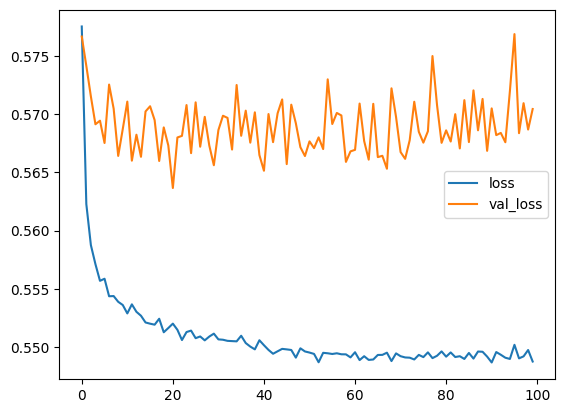

In [32]:
histories[['loss', 'val_loss']].plot()

In [33]:
# Evaluate the model using the test data
deep_model1.evaluate(X_test_scaled, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7344 - loss: 0.5511


[0.5593383312225342, 0.728863000869751]

## 2nd optimization trial

In [34]:
# Define model #2 - deep neural net, i.e., the number of input features and hidden nodes for each layer.
deep_model2 = keras.Sequential()
input_layer = keras.Input(shape=(number_input_features,))
deep_model2.add(input_layer)

# First hidden layer
deep_model2.add(layers.Dense(90, activation="relu"))

# Second hidden layer
deep_model2.add(layers.Dense(30, activation="relu"))

# Third hidden layer
deep_model2.add(layers.Dense(30, activation="relu"))

# Output layer
deep_model2.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
deep_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 90)                  │           3,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,841 (26.72 KB)

 Trainable params: 6,841 (26.72 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile the model
deep_model2.compile(
        optimizer=keras.optimizers.RMSprop(),  # Optimizer
        # Loss function to minimize
        loss=keras.losses.BinaryCrossentropy(),
        # List of metrics to monitor
        metrics=[keras.metrics.BinaryAccuracy()],
    )

In [36]:
# Train the model
history = deep_model2.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=200,
    validation_split=.2,
)

Epoch 1/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.6997 - loss: 0.5975 - val_binary_accuracy: 0.7201 - val_loss: 0.5735
Epoch 2/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7349 - loss: 0.5565 - val_binary_accuracy: 0.7176 - val_loss: 0.5746
Epoch 3/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7307 - loss: 0.5571 - val_binary_accuracy: 0.7188 - val_loss: 0.5736
Epoch 4/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7292 - loss: 0.5559 - val_binary_accuracy: 0.7213 - val_loss: 0.5724
Epoch 5/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7275 - loss: 0.5590 - val_binary_accuracy: 0.7197 - val_loss: 0.5738
Epoch 6/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.7364 - loss: 0.5516 - val_binary_accuracy: 0.7199 - val_loss: 0.5777
Epoch 7/200
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7309 - loss: 0.5556 - val_binary_accuracy: 0.7188 - val_loss: 0.5741

In [37]:
histories = pd.DataFrame(history.history)
histories.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.721415,0.573864,0.720117,0.573514
1,0.729919,0.560539,0.717590,0.574564
2,0.729773,0.558608,0.718756,0.573562
3,0.729919,0.557031,0.721283,0.572381
4,0.731279,0.556906,0.719728,0.573847


<Axes: >

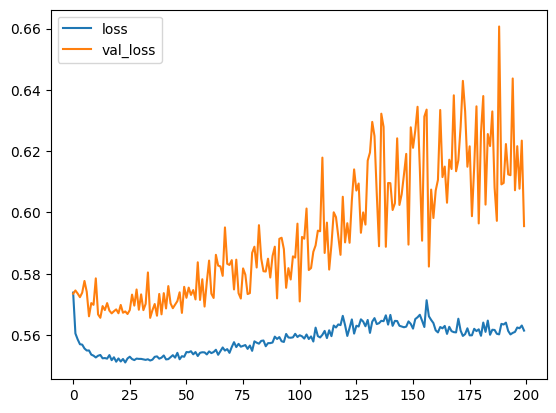

In [38]:
histories[['loss', 'val_loss']].plot()

In [39]:
# Evaluate the model using the test data
deep_model2.evaluate(X_test_scaled, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7300 - loss: 0.5787


[0.5903307199478149, 0.7259474992752075]

## 3rd optimization trial

In [40]:
# Define model #3 - deep neural net, i.e., the number of input features and hidden nodes for each layer.
deep_model3 = keras.Sequential()
input_layer = keras.Input(shape=(number_input_features,))
deep_model3.add(input_layer)

# First hidden layer
deep_model3.add(layers.Dense(90, activation="relu"))

# Second hidden layer
deep_model3.add(layers.Dense(90, activation="relu"))

# Third hidden layer
deep_model3.add(layers.Dense(30, activation="relu"))

# Output layer
deep_model3.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
deep_model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 90)                  │           3,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 90)                  │           8,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,101 (55.08 KB)

 Trainable params: 14,101 (55.08 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compile the model
deep_model3.compile(
        optimizer=keras.optimizers.RMSprop(),  # Optimizer
        # Loss function to minimize
        loss=keras.losses.BinaryCrossentropy(),
        # List of metrics to monitor
        metrics=[keras.metrics.BinaryAccuracy()],
    )

In [42]:
# Train the model
history3 = deep_model3.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=.2,
)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.7183 - loss: 0.5817 - val_binary_accuracy: 0.7228 - val_loss: 0.5727
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.7286 - loss: 0.5612 - val_binary_accuracy: 0.7228 - val_loss: 0.5823
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7304 - loss: 0.5569 - val_binary_accuracy: 0.7250 - val_loss: 0.5711
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.7339 - loss: 0.5542 - val_binary_accuracy: 0.7246 - val_loss: 0.5686
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7350 - loss: 0.5562 - val_binary_accuracy: 0.7246 - val_loss: 0.5701
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7336 - loss: 0.5579 - val_binary_accuracy: 0.7263 - val_loss: 0.5660
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.7338 - loss: 0.5601 - val_binary_accuracy: 0.7232 - val_loss: 0.5710

In [43]:
histories = pd.DataFrame(history3.history)
histories.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.724768,0.571221,0.722838,0.572737
1,0.730065,0.561335,0.722838,0.582258
2,0.730745,0.559503,0.724976,0.571097
3,0.732203,0.557361,0.724587,0.568620
4,0.733855,0.557224,0.724587,0.570067


<Axes: >

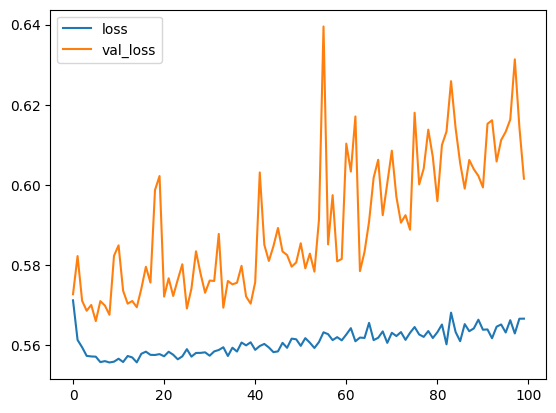

In [44]:
histories[['loss', 'val_loss']].plot()

In [45]:
# Evaluate the model using the test data
deep_model3.evaluate(X_test_scaled, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.7325 - loss: 0.5755


[0.5749327540397644, 0.7262973785400391]

In [46]:
# need to load 'drive' in order to export files to Google Drive --
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# Export our model to HDF5 file. Use the first model as it is the best optimization trial.
HDF5_file_path = '/content/drive/My Drive/AlphabetSoupCharity_Optimization.h5'
deep_model1.save(HDF5_file_path, overwrite=True, save_format='h5')

In [48]:
# because of the warning that h5 is a legacy format, save the model also in keras format
colab_file_path = '/content/drive/My Drive/AlphabetSoupCharity_Optimization.keras'
deep_model1.save(colab_file_path)